In [34]:
# import dependencies
import pandas as pd
import numpy as np
from datetime import datetime, date

# Import sqlalchemy Dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
from sqlalchemy import text
from sqlalchemy import Column, Float, Integer, String, DateTime
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.dialects.sqlite import DATETIME

In [2]:
# Create an engine for the hawaii.sqlite database
engine = create_engine("sqlite:///hawaii.sqlite", echo =False)

In [3]:
# Reflect Database into ORM classes
Base = automap_base()

# .prepare to reflect the keys from the database
Base.prepare(engine, reflect=True)

# Save references to the Hawaii_Stations and Hawaii_Measurements tables
Station = Base.classes.Hawaii_Stations
Measurement = Base.classes.Hawaii_Measurements

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

con = engine.connect()

# Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the date and prcp values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Plot the results using the DataFrame plot method.

In [5]:
# select date, prcp from measurements where date between last year
# session query for date, prcp between 08/23/16 - 08/23/17

date_prcp = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date.between('2016-08-23','2017-08-23')).statement


In [6]:
# read sql query in DataFrame
dp_DF = pd.read_sql_query(date_prcp, session.bind)

In [7]:
# set index to date
DF = dp_DF.set_index('date')
DF.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [8]:
# plot results for date, precipitation
#import matplotlin dependencies

import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.dates as mdates
from matplotlib import style
import matplotlib.pyplot as plt
%matplotlib inline


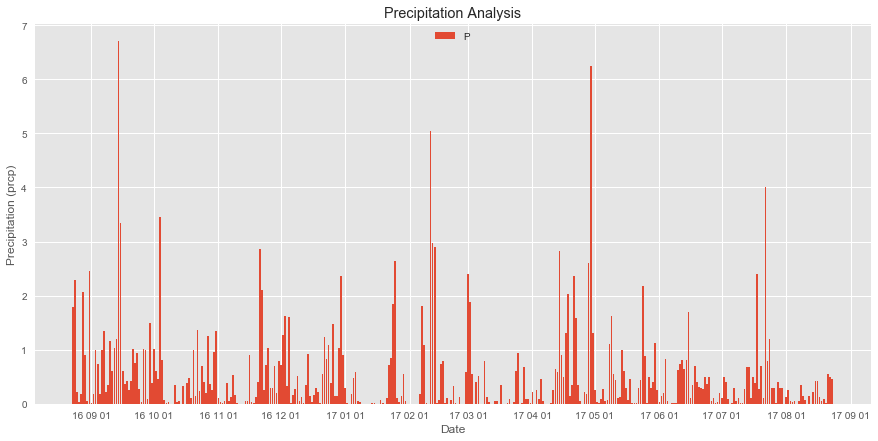

In [9]:
# Precipitation Analysis Plot

plt.style.use('ggplot')

#plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(DF.index, DF['prcp'])

#set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
#format date
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y %m %d'))

ax.set_title('Precipitation Analysis')
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (prcp)')
ax.legend('Precipitation',loc='upper center', shadow=True)

plt.show()

# Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.
    * List the stations and observation counts in descending order
    * Which station has the highest number of observations?

* Design a query to retrieve the last 12 months of temperature observation data (tobs).
    * Filter by the station with the highest number of observations.
    * Plot the results as a histogram with bins=12.

In [10]:
# query to calculate total number of stations
# select count(station) from Station

station_count = session.query(Station).count()
print("There are "+ str(station_count) +" stations.")

There are 9 stations.


In [11]:
# query to find the most active stations
# list of stations and observation counts (tobs) in descending order

station_tobs = session.query(Measurement.station, func.count(Measurement.station)).\
                             group_by(Measurement.station).\
                             order_by(func.count(Measurement.station).desc()).all()

station_tobs

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [12]:
# which station has the highest number of observations

station_tobs_highest = session.query(Measurement.station).\
                             group_by(Measurement.station).\
                             order_by(func.count(Measurement.station).desc()).first()

station_tobs_highest
print(str(station_tobs_highest)+" station has the highest number of observations")

('USC00519281',) station has the highest number of observations


In [13]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs)
station_tobs_query = session.query(Measurement.station, Measurement.date, func.count(Measurement.station)).\
                             group_by(Measurement.station).\
                             order_by(func.count(Measurement.station).desc()).\
        filter(Measurement.date.between('2016-08-23','2017-08-23')).statement


In [14]:
# read sql query in DataFrame
tobs_DF = pd.read_sql_query(station_tobs_query, session.bind)
tobs_DF

,station,date,count_1
0,USC00519397,2017-08-23,361
1,USC00519281,2017-08-18,352
2,USC00516128,2017-08-23,349
3,USC00513117,2017-07-31,343
4,USC00519523,2017-08-23,337
5,USC00514830,2017-08-23,305
6,USC00517948,2017-07-31,183


In [15]:
# filter by station with the highest tobs
tobs_highest = session.query(Measurement.station, Measurement.date, func.count(Measurement.station)).\
                             group_by(Measurement.station).\
                             order_by(func.count(Measurement.station).desc()).\
        filter(Measurement.date.between('2016-08-23','2017-08-23')).limit(1).statement
tobs_highest


<sqlalchemy.sql.annotation.AnnotatedSelect at 0x21149727198; AnnotatedSelect object>

In [16]:
tobs_DF = pd.read_sql_query(tobs_highest, session.bind)
tobs_DF


,station,date,count_1
0,USC00519397,2017-08-23,361


In [17]:
tobshighDF = session.query(Measurement.station, Measurement.tobs).\
filter(Measurement.date.between('2016-08-23','2017-08-23')).\
filter(Measurement.station == 'USC00519397').statement

tobs_DF_high = pd.read_sql_query(tobshighDF, session.bind)
tobs_DF_high.head()

,station,tobs
0,USC00519397,81
1,USC00519397,79
2,USC00519397,80
3,USC00519397,79
4,USC00519397,77


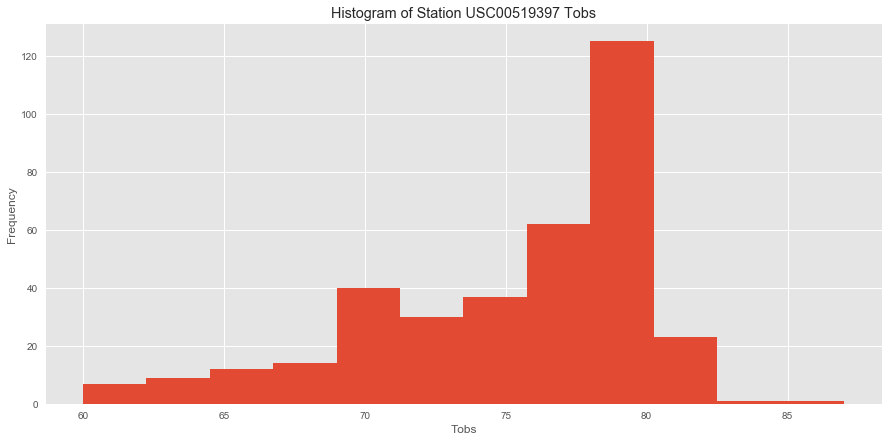

In [18]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.hist(x=tobs_DF_high['tobs'],bins = 12)

plt.xlabel('Tobs')
plt.ylabel('Frequency')
plt.title('Histogram of Station USC00519397 Tobs')
plt.grid(True)
plt.show()

# Temperature Analysis

* Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.


* Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")


* Plot the min, avg, and max temperature from your previous query as a bar chart.
    * Use the average temperature as the bar height.
    * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [112]:
# query to find temp min, max, average
calc_temp = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                         filter(Measurement.date.between('2017-08-10','2017-08-23')).\
                         all()
        
calc_temp

[(70, 85, 78.71428571428571)]

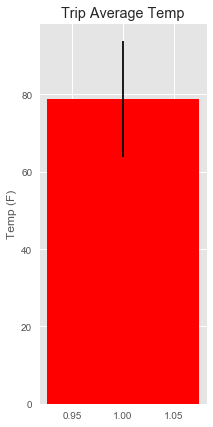

In [109]:
# bar plot for temp min, max, average
# manually inputed numbers

import numpy as np
import matplotlib.pyplot as plt


avg_temp = 78.71428571428571
peak = 85 - 70

plt.figure(figsize=(3,7))
plt.bar(1,avg_temp, width = 0.15, color='r', yerr=peak)


# add some text for labels, title and axes ticks
plt.ylabel('Temp (F)')
plt.title('Trip Average Temp')

plt.show()